##**Car Selling prices prediction App**

##**Imorting Libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV





##**Reading & Exploring Data**

In [51]:
df = pd.read_csv("reg_cars_selling.csv")

In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,RPM
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0,4500.0


In [53]:
df.shape

(8128, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7898 non-null   float64
 12  seats          7907 non-null   float64
 13  RPM            7709 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 889.1+ KB


In [55]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [56]:
df.dropna(inplace=True)

In [57]:
df.describe().round(2)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,RPM
count,7708.00,7708.00,7708.00,7708.00,7708.00,7708.00,7708.00,7708.00,7708.00
mean,2014.04,643277.54,68490.07,19.50,1445.36,91.35,167.05,5.40,2898.96
std,3.85,792882.37,56373.09,4.02,494.29,35.33,96.91,0.94,985.83
min,1994.00,29999.00,1.00,0.00,624.00,32.80,4.80,2.00,1300.00
25%,2012.00,270000.00,34000.00,16.80,1197.00,68.05,100.00,5.00,2000.00
50%,2015.00,459999.00,60000.00,19.40,1248.00,82.00,153.00,5.00,2400.00
75%,2017.00,690000.00,92000.00,22.33,1527.00,102.00,200.00,5.00,4000.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,789.00,14.00,21800.00


In [58]:
df.duplicated().sum()

1153

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.shape

(6555, 14)

In [61]:
df['engine'].astype(int)
df['max_power'].astype(float)
df['torque'].astype(float)
df['mileage'].astype(float)

,mileage
0,23.40
1,21.14
2,17.70
3,23.00
4,16.10
...,...
8121,18.90
8122,22.54
8123,18.50
8124,16.80


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6555 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6555 non-null   object 
 1   year           6555 non-null   int64  
 2   selling_price  6555 non-null   int64  
 3   km_driven      6555 non-null   int64  
 4   fuel           6555 non-null   object 
 5   seller_type    6555 non-null   object 
 6   transmission   6555 non-null   object 
 7   owner          6555 non-null   object 
 8   mileage        6555 non-null   float64
 9   engine         6555 non-null   float64
 10  max_power      6555 non-null   float64
 11  torque         6555 non-null   float64
 12  seats          6555 non-null   float64
 13  RPM            6555 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 768.2+ KB


In [63]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


mileage_outliers = find_outliers_iqr(df, 'mileage')
engine_outliers = find_outliers_iqr(df, 'engine')
max_power_outliers = find_outliers_iqr(df, 'max_power')
torque_outliers = find_outliers_iqr(df, 'torque')
km_driven_outliers = find_outliers_iqr(df, 'km_driven')

In [64]:
df.drop(mileage_outliers.index, inplace=True, errors='ignore')
df.drop(engine_outliers.index, inplace=True, errors='ignore')
df.drop(max_power_outliers.index, inplace=True, errors='ignore')
df.drop(torque_outliers.index, inplace=True, errors='ignore')
df.drop(km_driven_outliers.index, inplace=True, errors='ignore')

##**EDA**

In [65]:
# get average price
avg_price = df['selling_price'].mean().round(2)
print(f"The average price is: {avg_price}")

The average price is: 427851.08


In [66]:
# Find the most frequent fuel type
most_frequent_fuel_type = df['fuel'].mode()[0]
print(f"The most frequent fuel type is: {most_frequent_fuel_type}")

The most frequent fuel type is: Petrol


In [67]:
# Find the most frequent transmission type
most_frequent_transmission_type = df['transmission'].mode()[0]
print(f"The most frequent transmission type is: {most_frequent_transmission_type}")

The most frequent transmission type is: Manual


In [68]:
# Find the average km driven
avg_km_driven = df['km_driven'].mean().round(2)
print(f"The average km driven is: {avg_km_driven}")

The average km driven is: 65448.74


In [69]:
avg_mileage = df['mileage'].mean().round(2)
print(f"The average mileage is: {avg_mileage}")

The average mileage is: 20.63


In [70]:
avg_engine = df['engine'].mean().round(2)
print(f"The average engine is: {avg_engine}")

The average engine is: 1230.59


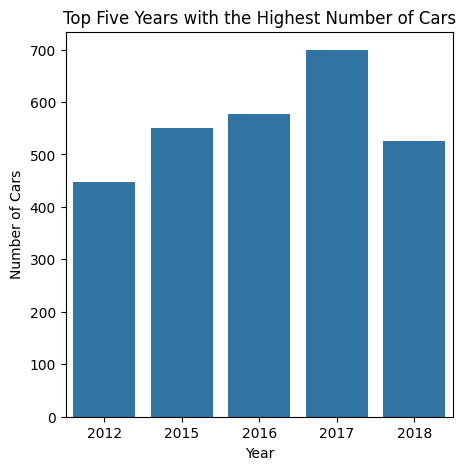

In [71]:
# Assuming 'year' is a column in your DataFrame 'df'
top_five_years = df['year'].value_counts().nlargest(5)

plt.figure(figsize=(5, 5))
sns.barplot(x=top_five_years.index, y=top_five_years.values)
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.title("Top Five Years with the Highest Number of Cars")
plt.show()

##**Feautere Engineering**

###Encoding

In [72]:
LE = LabelEncoder()

In [73]:
df['fuel_en'] = LE.fit_transform(df['fuel'])
df['seller_type_en'] = LE.fit_transform(df['seller_type'])
df['transmission_en'] = LE.fit_transform(df['transmission'])
df['owner_en'] = LE.fit_transform(df['owner'])

In [74]:
df[['fuel','fuel_en']].drop_duplicates()

,fuel,fuel_en
0,Diesel,1
2,Petrol,3
6,LPG,2
203,CNG,0


In [75]:
df[['seller_type','seller_type_en']].drop_duplicates()

,seller_type,seller_type_en
0,Individual,1
42,Dealer,0
376,Trustmark Dealer,2


In [76]:
df[['transmission','transmission_en']].drop_duplicates()

,transmission,transmission_en
0,Manual,1
44,Automatic,0


In [77]:
df[['owner','owner_en']].drop_duplicates()

,owner,owner_en
0,First Owner,0
1,Second Owner,2
2,Third Owner,4
123,Fourth & Above Owner,1
4383,Test Drive Car,3


In [78]:
X = df.drop(['name','owner', 'fuel','seller_type','transmission','selling_price'] , axis = 1)
y = df['selling_price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Scaling

In [80]:
scaler = StandardScaler()

In [81]:
X_train_scaled = scaler.fit_transform(X_train)

In [82]:
X_test_scaled = scaler.transform(X_test)

In [83]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [84]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')


['target_scaler.pkl']

##**Building Model**

In [85]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()

In [86]:
param1 = {}
param1['regressor'] = [lr]

param2 = {}
param2['regressor__n_estimators'] = [50, 100, 200]
param2['regressor__max_depth'] = [5, 7, 9]
param2['regressor'] = [rf]

param3 = {}
param3['regressor__C'] = [0.1, 1, 10]
param3['regressor__kernel'] = ['linear', 'rbf']
param3['regressor__gamma'] = ['scale', 'auto']
param3['regressor__degree'] = [2, 3, 4]
param3['regressor'] = [svr]

In [87]:
pipeline = Pipeline([('regressor', lr)])
params = [param1, param2, param3]

In [88]:
grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs= -1 , scoring= 'r2')

In [89]:
grid_search.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LinearRegression()]},
                         {'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [5, 7, 9],
                          'regressor__n_estimators': [50, 100, 200]},
                         {'regressor': [SVR()], 'regressor__C': [0.1, 1, 10],
                          'regressor__degree': [2, 3, 4],
                          'regressor__gamma': ['scale', 'auto'],
                          'regressor__kernel': ['linear', 'rbf']}],
             scoring='r2')

In [90]:
grid_search.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 9,
 'regressor__n_estimators': 50}

In [91]:
my_model = grid_search.best_estimator_

In [92]:
joblib.dump(my_model, 'model.pkl')

y_pred = my_model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [93]:
y_pred

array([[1914883.33333333],
       [1914883.33333333],
       [1914883.33333333],
       ...,
       [1914883.33333333],
       [1914883.33333333],
       [1914883.33333333]])